In [1]:
import pandas as pd   # data manipulation
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # visualization
from sklearn.metrics import mean_squared_error # metrics
from sklearn.linear_model import LinearRegression # model
from sklearn.model_selection import train_test_split  # model

In [3]:
df = pd.read_csv("country_wise_latest (1).csv") # Load the data from the CSV file

print("Dataset Head:", df.head()) # Print the first few rows of the dataset
print("\nDataset Info:", df.info()) # Print information about the dataset

Dataset Head:   Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526         

In [18]:
# Cell 3 - Data Cleaning
# Clean the data
df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.reset_index(drop=True)

# Convert percentage strings to floats
percent_columns = ['Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']
for col in percent_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col])


Cell 4 - Exploratory Data Analysis

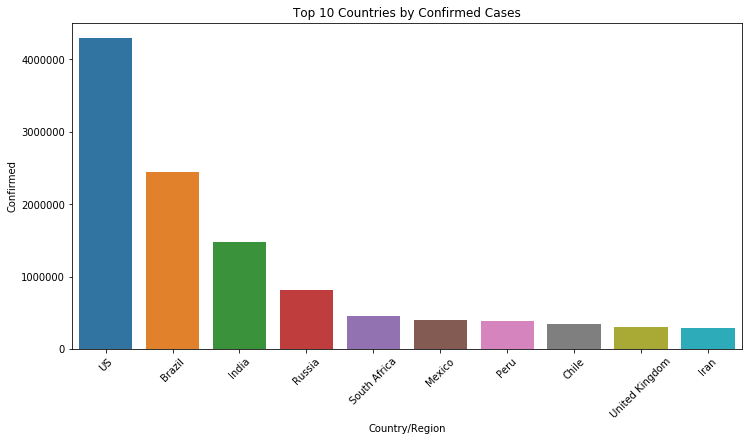

In [5]:
# Plot 1: Top 10 Countries by Confirmed Cases
plt.figure(figsize=(12, 6))
top_10_confirmed = df_cleaned.nlargest(10, 'Confirmed')
sns.barplot(data=top_10_confirmed, x='Country/Region', y='Confirmed')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Confirmed Cases')
plt.show()


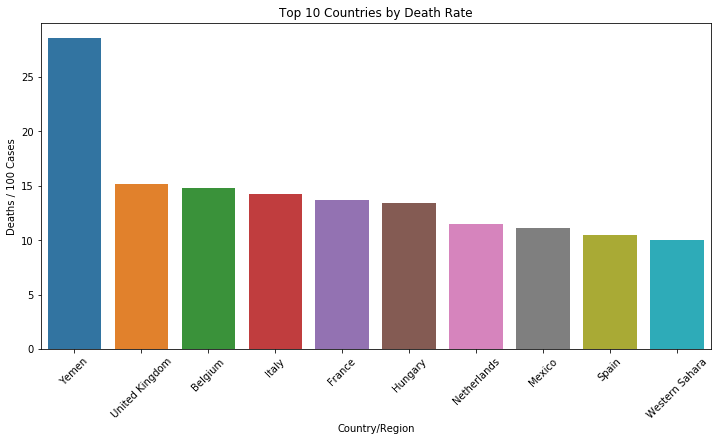

In [7]:
# Plot 2: Death Rate Analysis
plt.figure(figsize=(12, 6))
top_10_death_rate = df_cleaned.nlargest(10, 'Deaths / 100 Cases')
sns.barplot(data=top_10_death_rate, x='Country/Region', y='Deaths / 100 Cases')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Death Rate')
plt.show()


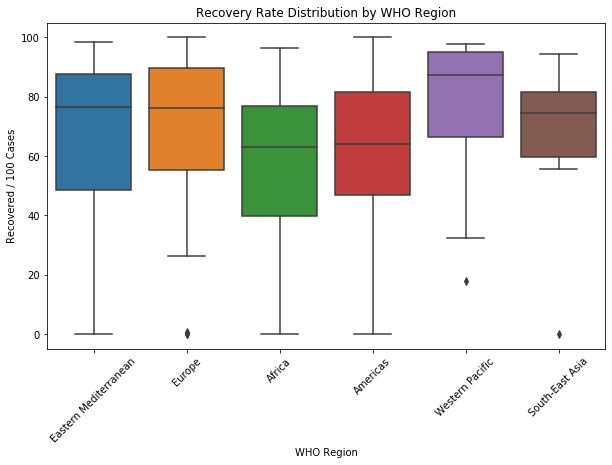

In [8]:
# Plot 3: Recovery Rate by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='WHO Region', y='Recovered / 100 Cases')
plt.xticks(rotation=45)
plt.title('Recovery Rate Distribution by WHO Region')
plt.show()

Cell 5 - Correlation Analysis

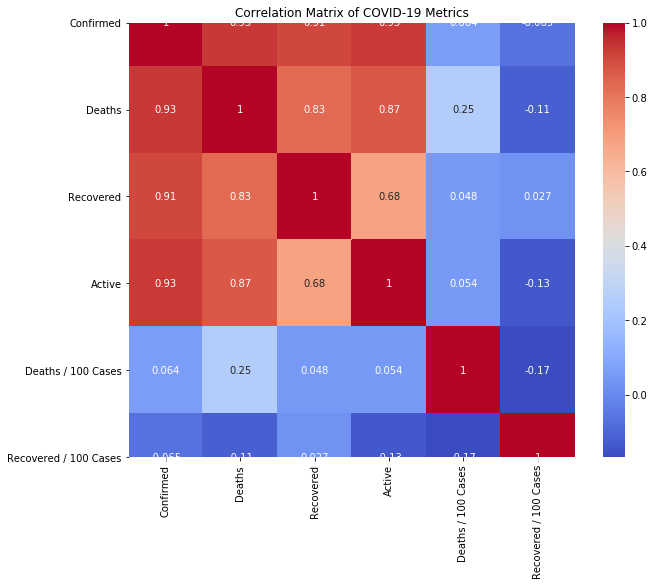

In [9]:
# Create correlation matrix for numerical columns
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Deaths / 100 Cases', 'Recovered / 100 Cases']
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()

Cell 6 - Predictive Modeling

In [10]:
X = df_cleaned[['Confirmed', 'Recovered', 'Active']]
y = df_cleaned['Deaths']


In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')


Mean Squared Error: 0.00
R-squared Score: 1.00


Cell 7 - Model Visualization

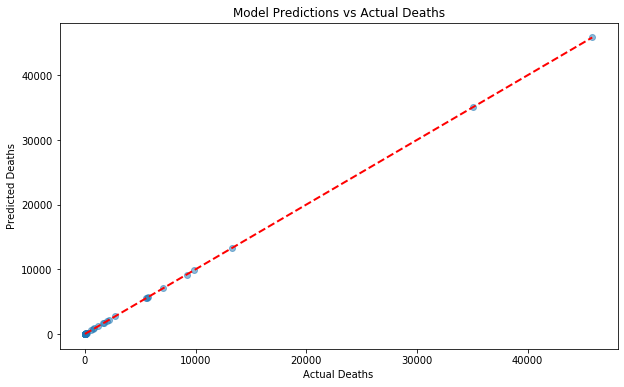

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Model Predictions vs Actual Deaths')
plt.show()


In [16]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns,'Coefficient': model.coef_})

In [17]:
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
     Feature  Coefficient
0  Confirmed          1.0
1  Recovered         -1.0
2     Active         -1.0
